# Design Storms

- The IDF approach only estimates average rate (over an averaging time).
- When time behavior of a storm is important then we have to generate hyetographs (time series of rainfall).
- Design storms are statistical models of such temporal behavior and are used in hydrologic models when hydrographs need to be generated

## Rainfall Distributions

- Rainfall distributions represent temporal patterns of a storm.
- A rainfall distribution is also called a hyetograph.
- Rainfall distributions are used when we need to estimate an entire hydrograph.

:::{admonition} Discrete Data Analysis

The Figure below is a representation of some continuous process.  To extract values by measurements only occurs at discrete points in time. These samples are reconstructed in a variety of ways to restore the original representation.

<figure align="center">
<!--<img src="./data_repr.png" width="400" > -->
<img src="http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson04/data_repr.png" width="400"> <figcaption>Figure XX. Data representations </figcaption>
</figure>

Real data are always some kind of discrete sample

- The “pulse” type is typical – and is called incremental data.
- For instance, incremental rainfall would be the catch over some time interval ($\Delta t$ in the figure)
- An alternative way to represent the data is with a cumulative representation (which is the running sum of the incremental data)

Figure XX below depicts the relationship between incremental and cumulative representations. Each “block” represents the amount of rainfall for the time interval
- The collection of blocks is called “incremental” rainfall (red)
- The running sum of the blocks is the cumulative distribution (blue)

A particular blocck is indicated with a height of about one, and time duration also one.  If for instance the block represents a depth the implication is that after one hour (from time 4 to 5 in the drawing) the depth added to some location is one unit. 

<figure align="center">
<!--<img src="./incr-cum-repr.png" width="400" > -->
<img src="http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson04/incr-cum-repr.png" width="400"> <figcaption>Figure XX. Data representations </figcaption>
</figure>

If these are watershed inches, then the drawing sugests that from hour zero to one, zero inches of precipitation occur, from hour one to two, about 1/4 inch; from hour 2 to 3, about 0.4 inch; from hour 3 to 4, about 0.7 inch; and hour 4 to 5; 1 inch; and so on.  If we tabulated the information we would have

|Time| Incremental Depth (Red)| Accumulated Depth (Blue)|
|---:|---:|---:|
|0|0.00|0.00|
|1|0.25|0.00|
|2|0.40|0.25|
|3|0.70|0.65|
|4|1.00|1.35|
|5|0.50|2.35|

Accumulating (running sum) the incremental is called “aggregation” (or just plain numerical integration); Differencing the cumulative is called “disaggregation.” For practical application its often handy to zero pad the leading and trailing edges so don’t have to worry too about forward/backward differencing issues.  

**Computational Thinking (ENGR-1330) - Accumulation**

Consider the need to accumulate data such as:

|Time (hours)| Incremental Depth (inches)| Accumulated Depth (inches)|
|---:|---:|---:|
|0|0.121||
|1|0.121||
|2|0.132||
|3|0.154||
|4|0.165||
|5|0.187||
|6|0.198||
|7|0.242||
|8|0.297||
|9|0.374||
|10|0.594||
|11|4.708||
|12|1.199||
|13|0.528||
|14|0.374||
|15|0.286||
|16|0.253||
|17|0.209||
|18|0.176||
|19|0.154||
|20|0.132||
|21|0.132||
|22|0.132||
|23|0.132||
|24|0.000||

Our goal is to complete the last column, in this case its relatively straight forward because the time spacing is uniform.  The approach is to perform numerical integration using rectangular panels looking backward in time.

$$acc_{i}=inc_{i-1}+acc_{i-1}$$


```
time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
increment=[0.121,0.121,0.132,0.154,0.165,0.187,0.198,0.242,0.297,0.374,0.594,4.708,1.199,0.528,0.374,0.286,0.253,0.209,0.176,0.154,0.132,0.132,0.132,0.132,0]
accumulate=[0 for i in range(len(time))]

for i in range(1,len(time)):
    accumulate[i] = accumulate[i-1]+increment[i-1]


import matplotlib.pyplot as plt # the python plotting library
plottitle ='Precipitation for Somewhere USA ' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, increment, c='red',drawstyle='steps') # step plot
plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Time (hours)')
plt.ylabel('Depth (inches)')
plt.legend(['Incremental Depth','Accumulated Depth'])
plt.title(plottitle)
plt.show()

```

![](somewhereUSArain.png)

:::

Distributions are created from historical storms and analyzed to generate statistical models of rainfall – these models are called design storms. Design storm distributions are typically represented as dimensionless hyetographs

Some examples include:

- NRCS Type Storms (24 hour, 6 hour) 
- Empirical Texas Hyetographs (TxHYETO-2015)


## NRCS (SCS) Rainfall Type Curves

SCS(1973) analyzed DDF curves to develop dimensionless rainfall temporal patterns called type curves for four different regions in the US. SCS type curves are in the form of percentage mass (cumulative) curves based on 24-hr rainfall of the desired frequency. Intended for use with the SCS Curve Number runoff generation model!

Location selects the type curve

![](scsLocation.png)

The 24-hour precipitation depth of desired frequency is specified (NOAA Atlas 14), then the SCS type curve is rescaled (multiplied by the known number) to get the time distribution. 

![](TCforRescale.png)

A tabular representation is

![](TCtabular.png)

A simple script to dimensionalize is listed below (along with the plotting script)

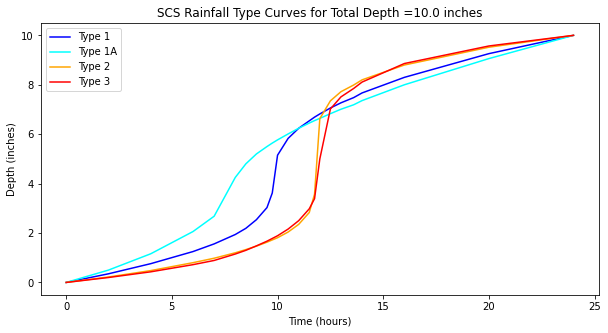

In [21]:
# SCS Type Curves

hour = [0,2,4,6,7,8,8.5,9,9.5,9.75,10,10.5,11,11.5,11.75,12,12.5,13.0,13.6,14,16,20,24]
type1 = [0,0.035,0.076,0.125,0.156,0.194,0.219,0.254,0.303,0.362,0.515,0.583,0.624,0.654,0.669,0.682,0.706,0.727,0.748,0.767,0.83,0.926,1]
type1A = [0,0.05,0.116,0.206,0.268,0.425,0.48,0.52,0.55,0.564,0.577,0.601,0.624,0.645,0.655,0.664,0.683,0.701,0.719,0.736,0.8,0.906,1]
type2 = [0,0.022,0.048,0.08,0.098,0.12,0.133,0.147,0.163,0.172,0.181,0.204,0.235,0.283,0.357,0.663,0.735,0.772,0.799,0.82,0.88,0.952,1]
type3 = [0,0.02,0.043,0.072,0.089,0.115,0.13,0.148,0.167,0.178,0.189,0.216,0.25,0.298,0.339,0.5,0.702,0.751,0.785,0.811,0.886,0.957,1]

t24  =[]
for i in range(len(hour)):
    t24.append(hour[i]/24.0)

# dimensionalize

Ptotal = 10.0
T1D =[0 for i in range(len(hour))]
T1AD =[0 for i in range(len(hour))]
T2D =[0 for i in range(len(hour))]
T3D =[0 for i in range(len(hour))]
for i in range(len(hour)):
    T1D[i]=Ptotal*type1[i]
    T1AD[i]=Ptotal*type1A[i]
    T2D[i]=Ptotal*type2[i]
    T3D[i]=Ptotal*type3[i]
#plot

import matplotlib.pyplot as plt # the python plotting library
plottitle ='SCS Rainfall Type Curves for Total Depth =' + str(Ptotal) +' inches'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(hour, T1D, c='blue') # step plot
plt.plot(hour, T1AD, c='cyan') # step plot
plt.plot(hour, T2D, c='orange') # step plot
plt.plot(hour, T3D, c='red') # step plot
#plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Time (hours)')
plt.ylabel('Depth (inches)')
plt.legend(['Type 1','Type 1A','Type 2','Type 3'])
plt.title(plottitle)
plt.show()


A variant for 6-hour durations is

![](SCS6hr.png)

Using the type curves is straightforward

1. Use NOAA Atlas 14, TP-40, or other defendable source to set total depth, P for the 24 hour storm (or 6 hour storm)
2. Pick appropriate SCS type curve (location).
3. Multiply (rescale) the type curve with P to get the design mass curve.

If you need incremental values, differencing the rescaled mass curve can be used to develop the design hyetograph.

## Texas Empirical Hyetograph-Based Design Storms

Alternative to SCS Type Curves for use in Texas are the [Texas Empirical Hyetographs](http://54.243.252.9/ce-3354-webroot/3-Readings/EmpiricalHyetographs/sir2004-5075.pdf)
- Based on Texas data.
- Reflects “front loading” observed in many real storms.
- Rescales both time and depth.

![](texashyetograph.png)

The authors suggest use of the 50th percentile curve (median storm).  

::{note}
The 90th percentile is appropriate for high consequence of failure targets (hospitals, sewage treatment plants, water treatment plants, nuclear power plants, thermal power plants, airports,...)
:::

- Multiply the time axis by the storm duration.
- Multiply the depth axis by the storm depth.
- Result is a design storm for given duration and AEP.

## References

1. [Chow, V.T., Maidment,D.M., and Mays, L.W. (1998) Applied Hydrology, McGraw Hill, (Read pages 26 to 31; 416 to 423)](http://54.243.252.9/ce-3354-webroot/3-Readings/CMM1988/) 

2. [McCuen, R.H., Johnson, P.A., and Ragan, R.M. (2002) Highway Hydrology. HDS-2 (2ed) FHWA-NHI-02-001 (Read pages 3-1 to 3-5; 4-86 to 4-89; 5-1 to 5-8; 5-16 to 5-17)](http://54.243.252.9/ce-3354-webroot/3-Readings/FHWAHighwayHydrology/FHWA-NHI-02-001.pdf)

3. [Texas Hydraulic Design Manual (2014-1) Texas Department of Transportation. (2014) Hydraulic Design Manual (Read pages 4-1 to 4-5; 4-31 to 4-35)](http://54.243.252.9/ce-3354-webroot/3-Readings/TXDOT-HYDM-2014/txdot-hdm-2014.pdf)

4. [Linear Theory of Hydrologic Systems Dooge, J.C. I. (1973) Linear Theory of Hydrologic Systems. USDA ARS Technical Bulletin No. 1468. (Read pages 127 to 147)](http://54.243.252.9/ce-3354-webroot/3-Readings/LS1973/linear-systems-hydrology-dooge.pdf)

5. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Discrete Data Analysis; Risk Based Design; Regression Equations)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture05.pdf)

6. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Probability Estimation Modeling)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture06.pdf)

7. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Point Precipitation; Design Storms)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture08.pdf)
